### Neural network regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./NN_data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
to_drop = ['date', 'street', 'statezip', 'country']

In [4]:
data.drop(columns=to_drop, inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [5]:
data[data['yr_renovated']!=0]['yr_renovated'].min()

1912

In [6]:
## How old is the house?
data['House_age'] = [2021 - yr_built for yr_built in data['yr_built']]

In [7]:
data.House_age

0        66
1       100
2        55
3        58
4        45
       ... 
4595     67
4596     38
4597     12
4598     47
4599     31
Name: House_age, Length: 4600, dtype: int64

In [8]:
### Was the house renovated ?
data["Was_renovated"] = [1 if yr_renovated !=0 else 0 for yr_renovated in data['yr_renovated']]

In [9]:
### Is the renovation recent?
data['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated)<=10 else 0 for yr_renovated in data['yr_renovated']]

In [10]:
data.drop(columns=['yr_renovated','yr_built'], inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House_age,Was_renovated,was_renovated_10_yrs
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,67,1,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,38,1,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,12,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,47,0,0


In [11]:
data.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

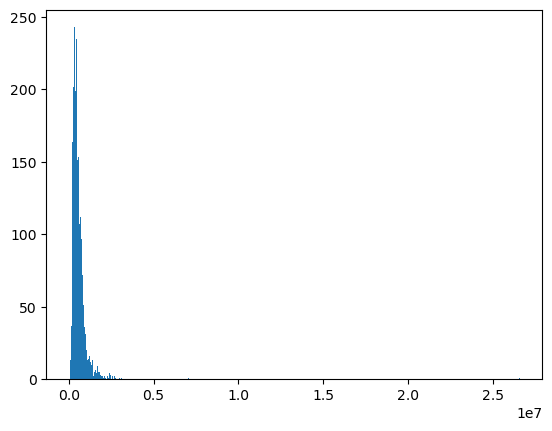

In [12]:
plt.hist(data['price'], bins=1000);

### Treating outliers using  Z - score method 

In [13]:
from scipy import stats

In [14]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House_age,Was_renovated,was_renovated_10_yrs
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,67,1,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,38,1,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,12,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,47,0,0


In [15]:
data['price_z'] = np.abs(stats.zscore(data['price']))
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House_age,Was_renovated,was_renovated_10_yrs,price_z
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,0.423864
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,3.249598
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0.372424
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0.234071
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,0.003482


In [16]:
data = data[data['price_z']<= 3]
data.shape

(4566, 16)

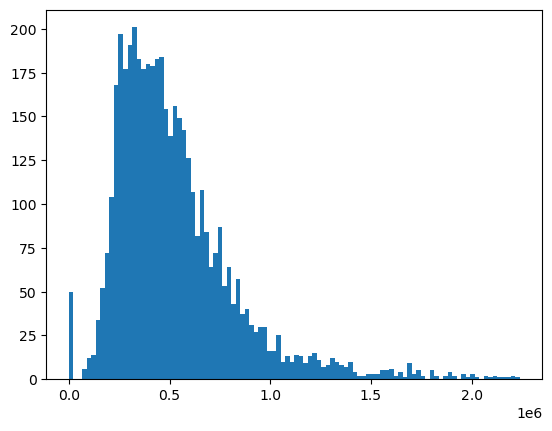

In [17]:
plt.hist(data['price'], bins=100);

In [18]:
data[data['price'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House_age,Was_renovated,was_renovated_10_yrs,price_z
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,Federal Way,59,0,0,0.979051
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,Seattle,61,1,0,0.979051
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,Burien,68,1,0,0.979051
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,Issaquah,38,0,0,0.979051
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,Burien,101,0,0,0.979051
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,Sammamish,31,1,0,0.979051
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,Enumclaw,14,0,0,0.979051
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,Normandy Park,61,1,0,0.979051
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,Snoqualmie,15,0,0,0.979051
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,Bellevue,8,1,0,0.979051


In [19]:
data =data[data['price']!=0]

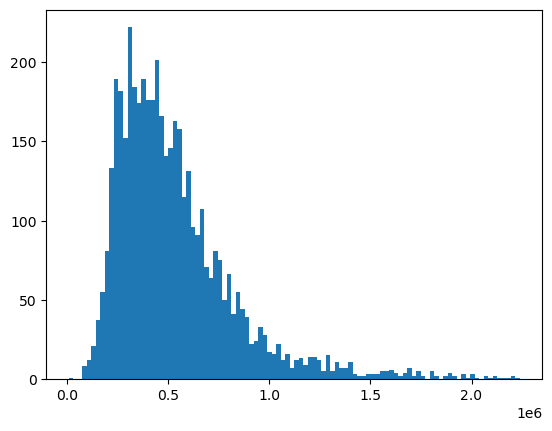

In [20]:
plt.hist(data['price'], bins=100);

In [21]:
data.drop(columns='price_z', inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House_age,Was_renovated,was_renovated_10_yrs
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,83,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,67,1,0
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,38,1,0
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,12,0,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,47,0,0


In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [23]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'city', 'House_age', 'Was_renovated', 'was_renovated_10_yrs'],
      dtype='object')

In [24]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House_age,Was_renovated,was_renovated_10_yrs
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,83,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,67,1,0
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,38,1,0
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,12,0,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,47,0,0


In [25]:
transformer = make_column_transformer(
(MinMaxScaler(), ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'House_age']),
    (OneHotEncoder(handle_unknown='ignore'), ['bedrooms','bathrooms', 'floors', 'view', 'condition'])    
)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = data.drop('price', axis=1)
y = data['price']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

### Applying the transformation to training and testing data

In [29]:
transformer.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['sqft_living', 'sqft_lot', 'sqft_above',
                                  'sqft_basement', 'House_age']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['bedrooms', 'bathrooms', 'floors', 'view',
                                  'condition'])])

In [30]:
x_train = transformer.transform(x_train)

In [31]:
x_test = transformer.transform(x_test)

In [32]:
x_train.shape, x_test.shape

((3613, 54), (904, 54))

### Tf cannot see the x_train and x_test data directly, we need to convert those ito arrays.

In [34]:
x_train=x_train.toarray()

In [35]:
x_test = x_test.toarray()

In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as k

In [37]:
def rmse(y_true, y_pred):
    return k.sqrt(k.mean(k.square(y_pred - y_true)))

##### It is basically a squared average between predictions and actual values

In [38]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(),metrics=[rmse],loss=rmse)

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
113/113 [==============================] - 1s 2ms/step - loss: 599989.1250 - rmse: 599970.6875
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 425673.4375 - rmse: 425534.1562
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 267614.9375 - rmse: 267565.8438
Epoch 4/100
113/113 [==============================] - 0s 2ms/step - loss: 247788.8125 - rmse: 247842.1094
Epoch 5/100
113/113 [==============================] - 0s 2ms/step - loss: 236911.6562 - rmse: 236863.2812
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 230052.5469 - rmse: 230125.2500
Epoch 7/100
113/113 [==============================] - 0s 2ms/step - loss: 224708.0312 - rmse: 224632.2969
Epoch 8/100
113/113 [==============================] - 0s 2ms/step - loss: 220779.9062 - rmse: 220875.2344
Epoch 9/100
113/113 [==============================] - 0s 2ms/step - loss: 217539.3906 - rmse: 217556.1875
Epoch 10/100
113/113 [===============

113/113 [==============================] - 0s 2ms/step - loss: 192583.0312 - rmse: 192538.5469
Epoch 77/100
113/113 [==============================] - 0s 2ms/step - loss: 193065.3438 - rmse: 193085.3438
Epoch 78/100
113/113 [==============================] - 0s 2ms/step - loss: 193227.4375 - rmse: 193254.9688
Epoch 79/100
113/113 [==============================] - 0s 2ms/step - loss: 193031.2031 - rmse: 193048.8906
Epoch 80/100
113/113 [==============================] - 0s 2ms/step - loss: 193437.1719 - rmse: 193436.9531
Epoch 81/100
113/113 [==============================] - 0s 2ms/step - loss: 193075.7969 - rmse: 193073.7344
Epoch 82/100
113/113 [==============================] - 0s 2ms/step - loss: 193268.0625 - rmse: 193235.3125
Epoch 83/100
113/113 [==============================] - 0s 2ms/step - loss: 192482.5312 - rmse: 192461.3594
Epoch 84/100
113/113 [==============================] - 0s 2ms/step - loss: 193002.8125 - rmse: 193021.9688
Epoch 85/100
113/113 [===================

In [39]:
predictions = model.predict(x_test)

29/29 [==============================] - 0s 1ms/step


In [40]:
predictions[:5]

array([[ 343600.72],
       [ 401015.7 ],
       [1068708.5 ],
       [ 851530.56],
       [ 611268.8 ]], dtype=float32)

### Converting this into 1D array using ravel

In [41]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 343600.72,  401015.7 , 1068708.5 ,  851530.56,  611268.8 ],
      dtype=float32)

In [42]:
rmse(y_test, predictions).numpy()

203037.8191396427